In [156]:
import tabula
import pandas as pd
import matplotlib.pyplot as plt

# df = pd.DataFrame()
df = tabula.read_pdf("2014-2015.pdf", pages="all", multiple_tables=True)

In [157]:
categories = []

In [158]:
publications = df[0]
categories.append(publications)

In [159]:
student_activity_groups = df[1:7]
categories.append(student_activity_groups)

In [160]:
student_initiated_service_groups = df[7:11]
categories.append(student_initiated_service_groups)

In [161]:
programs = df[11]
categories.append(programs)

In [162]:
operations = df[12]
categories.append(operations)

In [163]:
lead_center = df[13]
categories.append(operations)

In [164]:
president_office = df[14]
categories.append(president_office)

In [165]:
evp_office = df[15:17]
categories.append(evp_office)

In [166]:
eavp_office = df[17]
categories.append(eavp_office)

In [167]:
aavp_office = df[18]
categories.append(aavp_office)

In [168]:
osa_office = df[19]
categories.append(osa_office)

In [169]:
appointed_officials = df[20:22]
categories.append(appointed_officials)

In [170]:
senate = df[22]
categories.append(senate)

In [171]:
asuc_total = df[23]
categories.append(asuc_total)

In [172]:
graduate_assembly = df[24]
categories.append(graduate_assembly)

In [173]:
totals = df[25]
categories.append(totals)

In [174]:
appointed_officials

[                                   0     1                2                3  \
 0                APPOINTED OFFICIALS  Type  Funding Request  Finance Officer   
 1                   Attorney General    AG              NaN        $1,000.00   
 2  Commissioner of Diversity Affairs   CDA              NaN        $1,000.00   
 
                    4                 5  
 0  Finance Committee  Final Allocation  
 1          $1,000.00         $1,000.00  
 2          $1,000.00         $1,000.00  ,
                                           0    1        2           3  \
 0                       Comptroller General   CG      NaN   $1,000.00   
 1                          Election Council   EC      NaN  $20,000.00   
 2                           Finance Officer   FO      NaN   $1,500.00   
 3                          Judicial Council   JC  $750.00     $750.00   
 4     Marketing and Communications Director  MCD      NaN   $1,000.00   
 5  (Under MCD) Marketing and Communications  MCD      NaN   

In [175]:
def process_df_group(df_start_index, df_end_index=None):
    """
    takes in indices of df and returns processed df
    """
    # select df groups
    if df_end_index == None:
        df_spliced = df[df_start_index] 

        # set first row as header
        df_spliced.columns = df_spliced.iloc[0]
        df_spliced = df_spliced.reindex(df_spliced.index.drop(0))
    else:
        df_spliced_multiple = df[df_start_index:df_end_index]
                
        # set first row as header
        df_columns = df_spliced_multiple[0].iloc[0]
        #print('Cols', df_columns)
        df_spliced_multiple[0] = df_spliced_multiple[0].reindex(df_spliced_multiple[0].index.drop(0))
        
        df_spliced = pd.concat(df_spliced_multiple)
        
        df_spliced.columns = df_columns
        #print(df_spliced.head())
        df_spliced = df_spliced.dropna(axis=1, how='all')
            
    #print('-------')
    #print(df_spliced.columns)
    
    # columns to parse dollar values
    dollar_cols = ['Funding Request', 'Finance Officer', 'Finance Committee', 'Final Allocation'] 

    # convert dollar values to float values
    for col in dollar_cols:
        df_spliced[col] = df_spliced[col].apply(lambda x: str(x).replace('$', ''))
        df_spliced[col] = df_spliced[col].apply(lambda x: str(x).replace(',', ''))
        df_spliced[col] = df_spliced[col].apply(lambda x: float(x))

    df_spliced = df_spliced.astype(float, raise_on_error=False)
        
    # remove last row (subtotal row)
    df_spliced = df_spliced[:-1]
    
    # add column for difference between allocation and request
    df_spliced['Difference'] = df_spliced['Final Allocation'] - df_spliced['Funding Request']
    df_spliced['Difference Percentage'] = (df_spliced['Final Allocation'] - df_spliced['Funding Request'])/df_spliced['Funding Request']

    # rename first column from organization type to club name
    df_spliced.columns.values[0] = 'Name'
    
    return df_spliced


In [176]:
# categories = list of dataframes for each major category
categories = []

category_names = ['publications', 'student_activity_groups', 'student_initiated_service_groups', 'programs',
                 'operations', 'lead_center', 'president_office', 'evp_office', 'eavp_office', 'aavp_office',
                 'osa_office', 'appointed_officials', 'senate', 'asuc_total', 'graduate_assembly', 'totals']
category_splices = [[0, None], [1, 7], [7, 11], [11, None], [12, None], [13, None], [14, None]]
"""
TODO
excluding some "office of the ...." groups because they are not clubs
"""
for splice in category_splices:
    print(splice)
    categories.append(process_df_group(splice[0], splice[1]))

#print('-------------------------------------------------------')
#print(categories[0])

[0, None]
[1, 7]
[7, 11]
[11, None]
[12, None]
[13, None]
[14, None]


In [177]:
def join_pages(lst_df):
    if type(lst_df) != list:
        return lst_df
    df = lst_df[0]
    for i in range(1,len(lst_df)):
        df = df.append(lst_df[i])
    return df

In [178]:
joined_categories = list(map(join_pages, categories))

# Money Allocated by Organization Type

Each Org and Clubs + Amounts Received

PUB


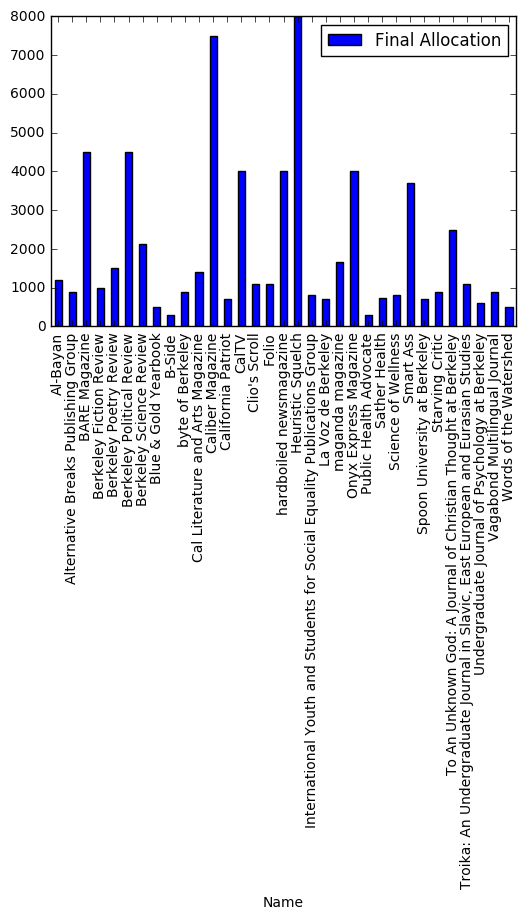

1    SAG
1    SAG
1    SAG
1    SAG
1    SAG
1    SAG
Name: Type, dtype: object


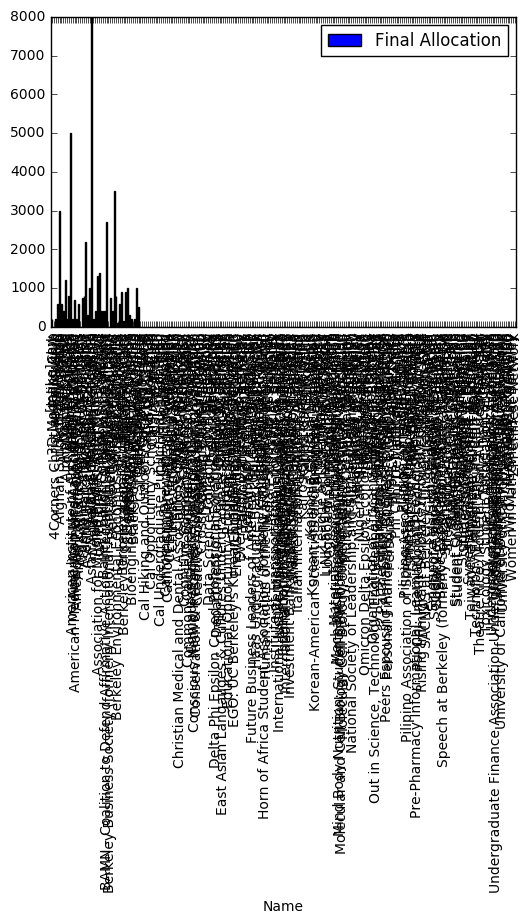

1    SISG
1    SISG
1    SISG
1    SISG
Name: Type, dtype: object


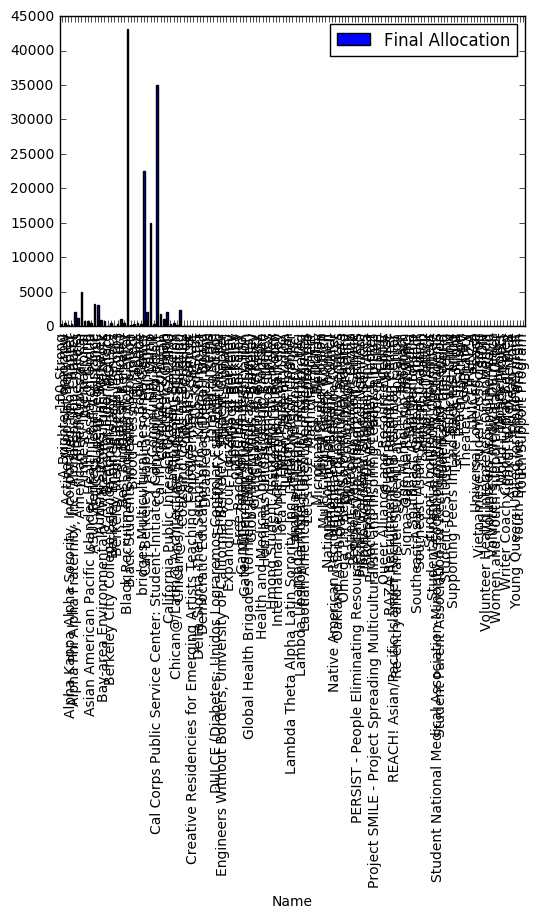

ASUC


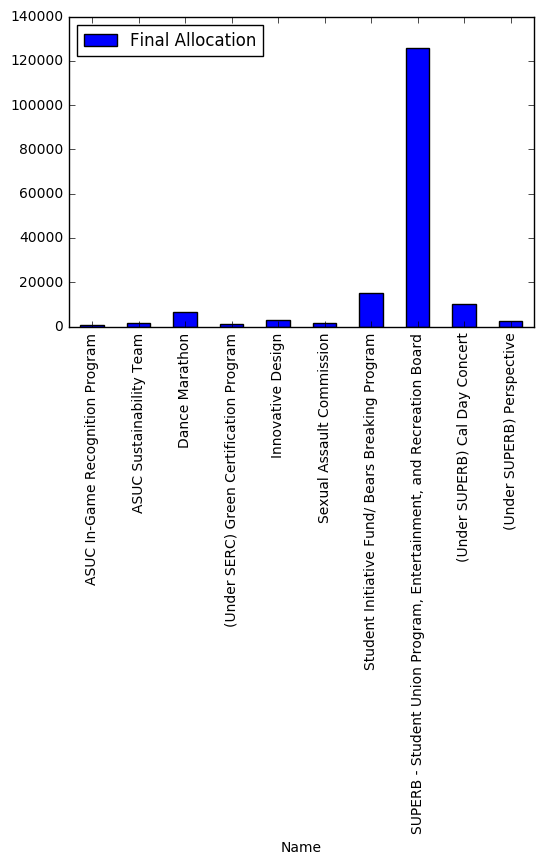

ASUC


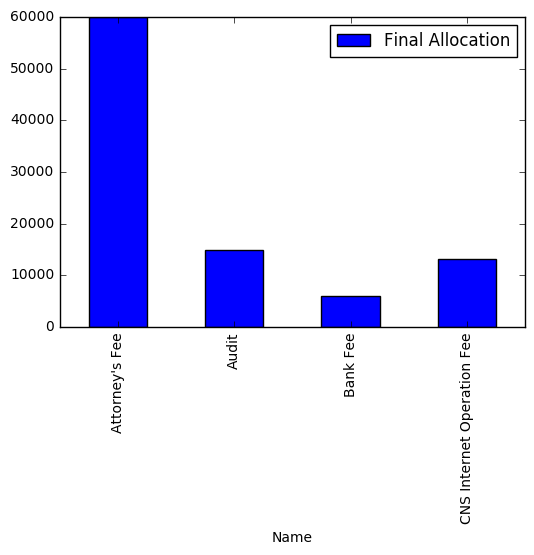

LEAD


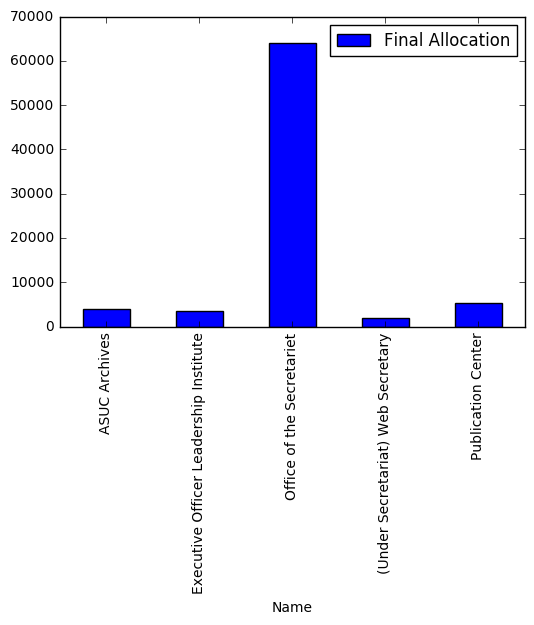

OP


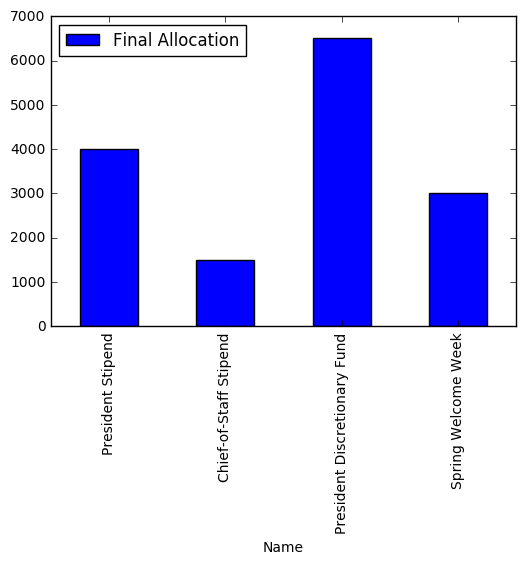

In [179]:
for i in range(len(categories)):
    print(categories[i]['Type'][1])
    plt.figure()
    categories[i].plot.bar(x='Name',y='Final Allocation')
    plt.show()

# Money Requested by Organization Type

Each Org and Clubs + Amounts Requested

PUB


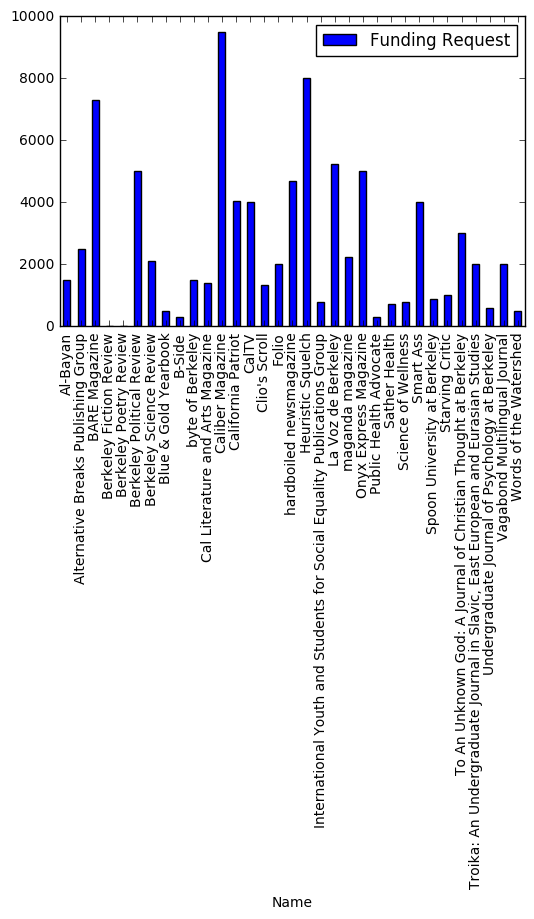

1    SAG
1    SAG
1    SAG
1    SAG
1    SAG
1    SAG
Name: Type, dtype: object


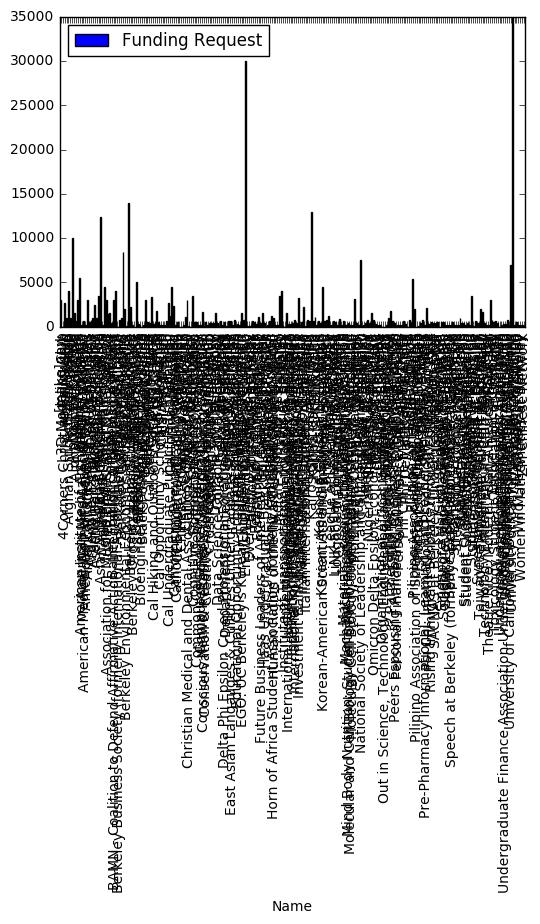

1    SISG
1    SISG
1    SISG
1    SISG
Name: Type, dtype: object


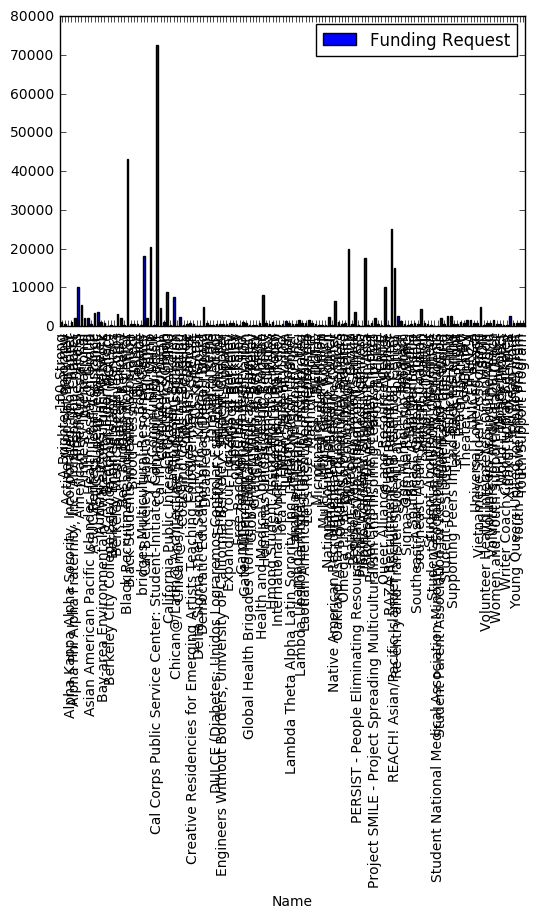

ASUC


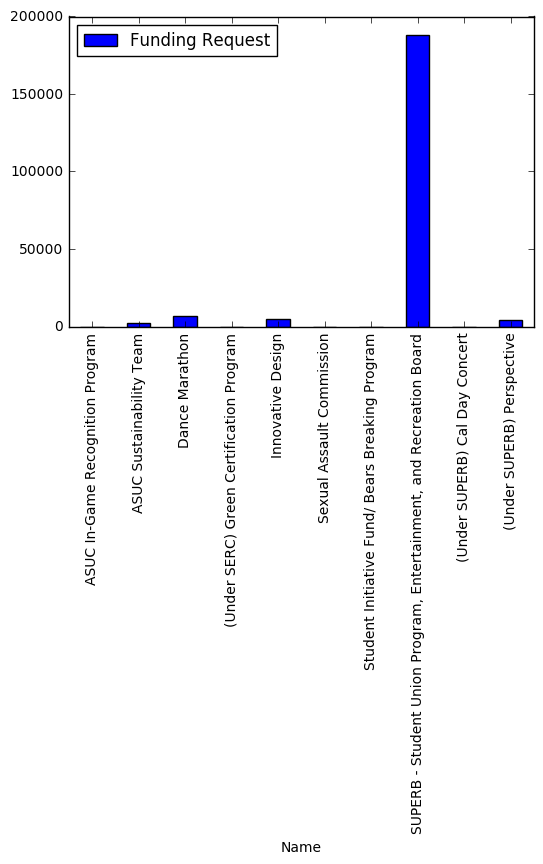

ASUC


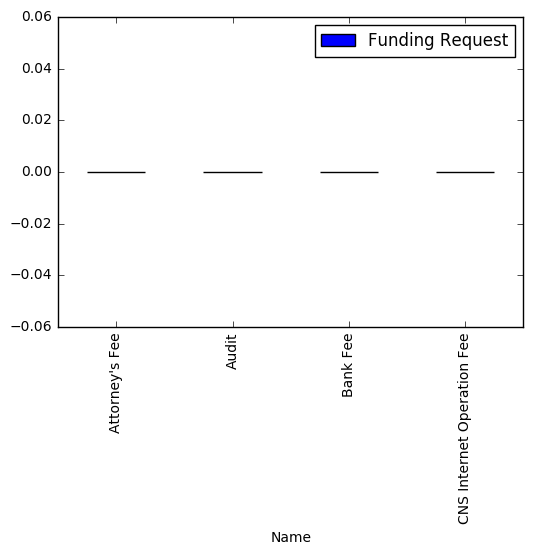

LEAD


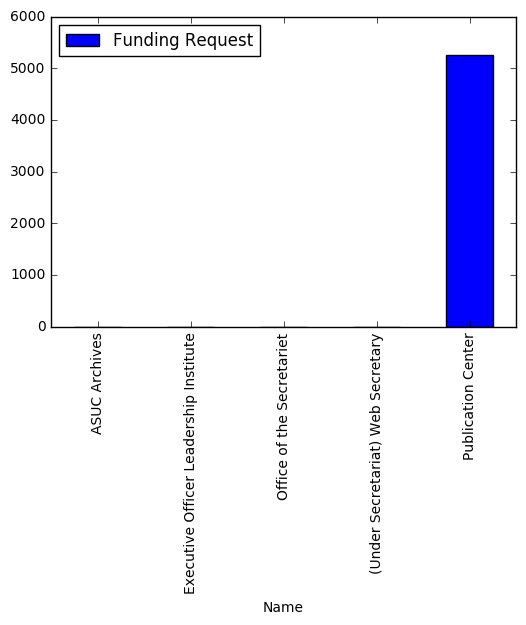

OP


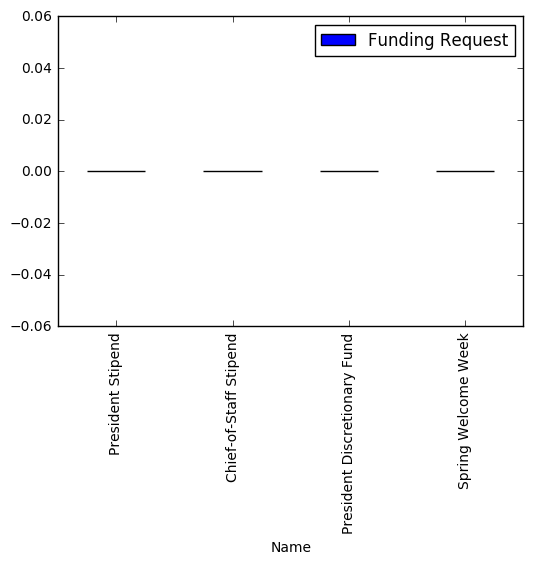

In [180]:
for i in range(len(categories)):
    print(categories[i]['Type'][1])
    plt.figure()
    categories[i].plot.bar(x='Name',y='Funding Request')
    plt.show()

# Money Requested vs. Allocated by Organization Type

PUB


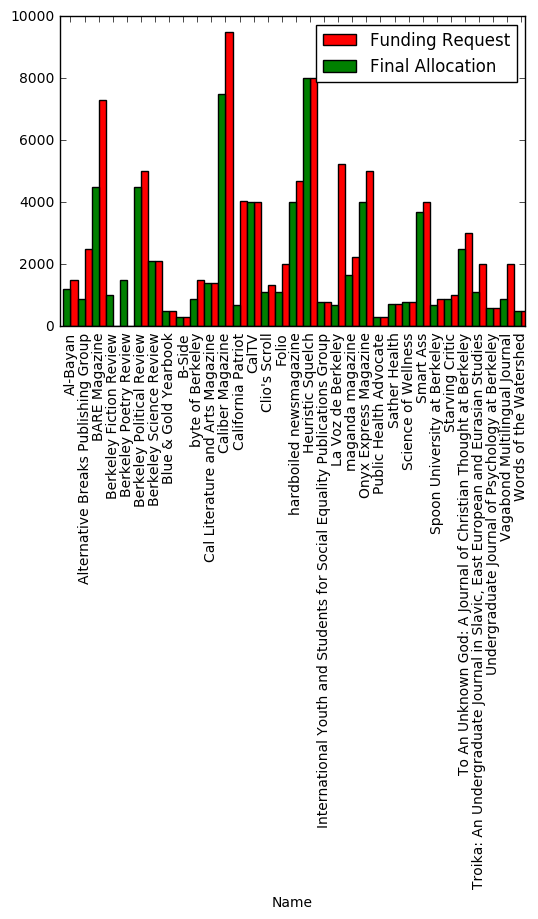

1    SAG
1    SAG
1    SAG
1    SAG
1    SAG
1    SAG
Name: Type, dtype: object


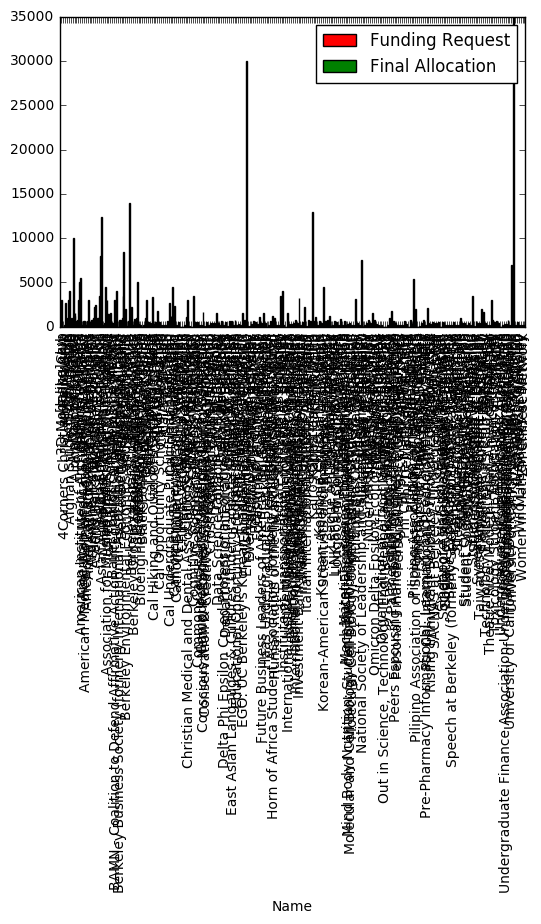

1    SISG
1    SISG
1    SISG
1    SISG
Name: Type, dtype: object


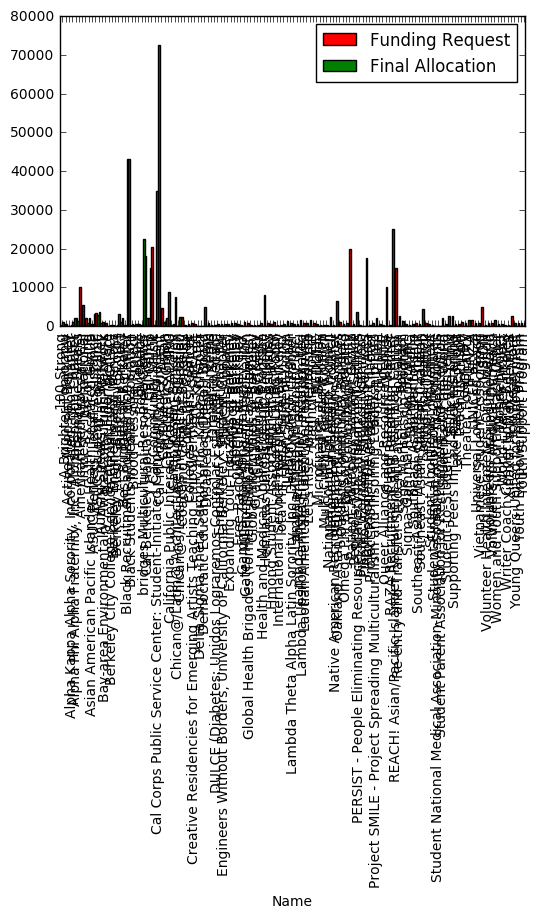

ASUC


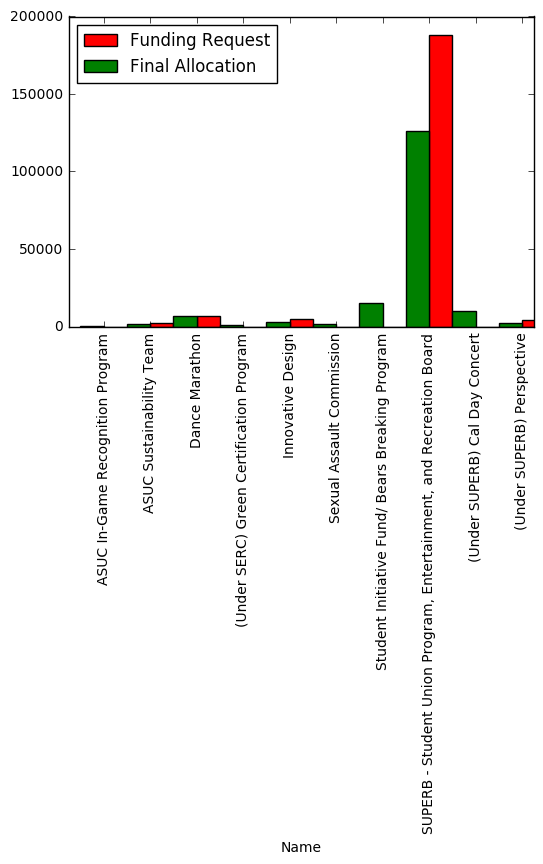

ASUC


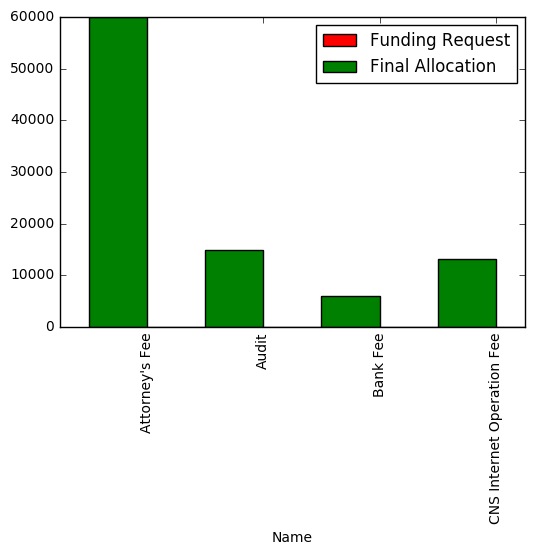

LEAD


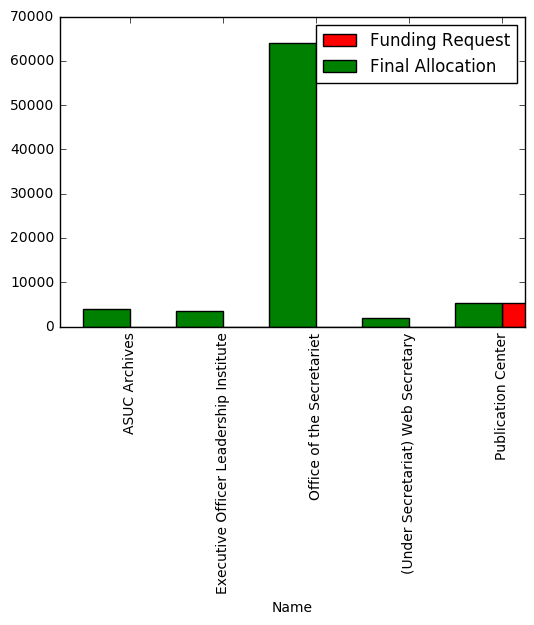

OP


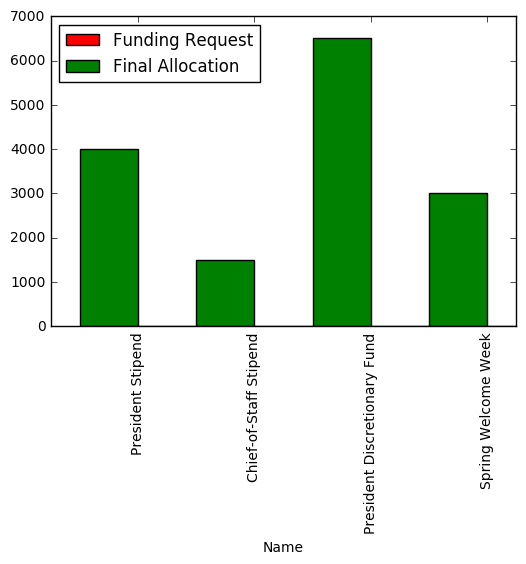

In [181]:
for i in range(len(categories)):
    print(categories[i]['Type'][1])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    categories[i].plot(kind='bar', color='red', ax=ax, position=0, x='Name',y='Funding Request')
    categories[i].plot(kind='bar', color='green', ax=ax, position=1, x='Name',y='Final Allocation')
    plt.show()

# Money Requested vs. Allocated by Organization Type

PUB


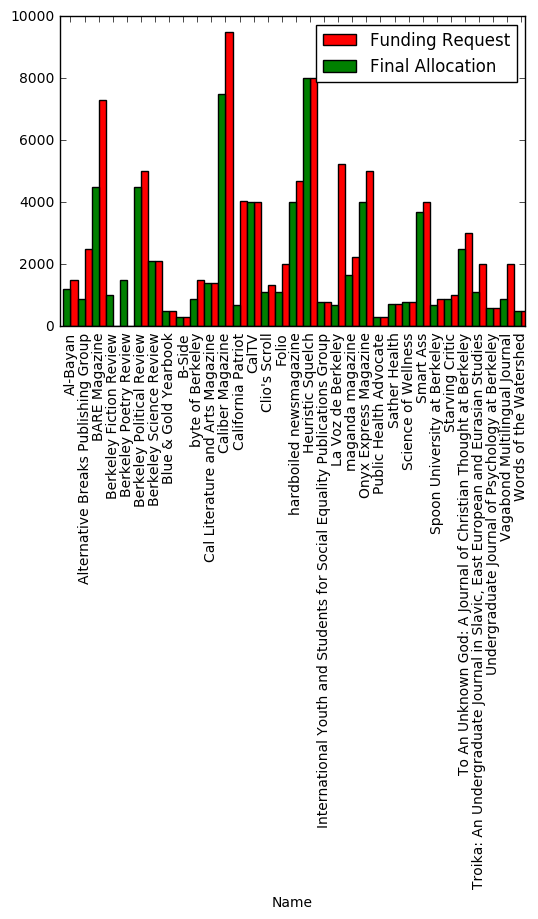

1    SAG
1    SAG
1    SAG
1    SAG
1    SAG
1    SAG
Name: Type, dtype: object


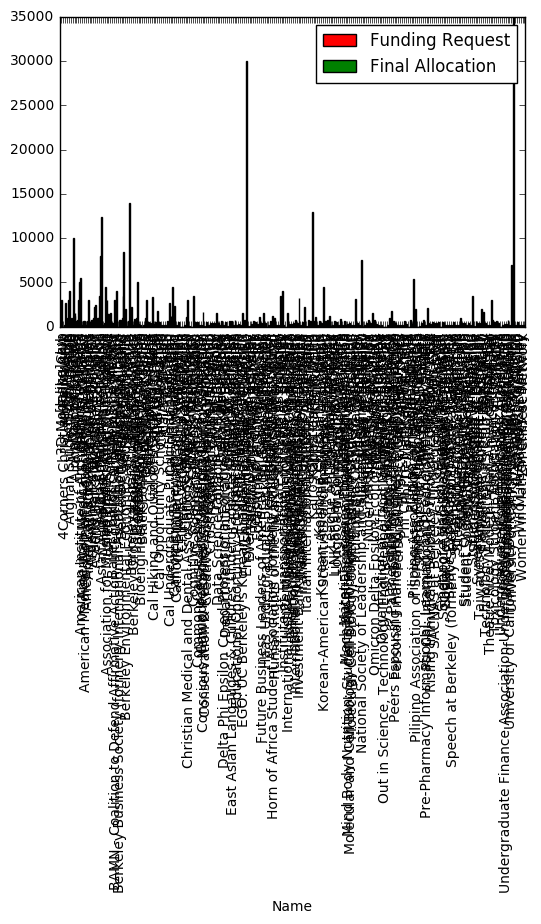

1    SISG
1    SISG
1    SISG
1    SISG
Name: Type, dtype: object


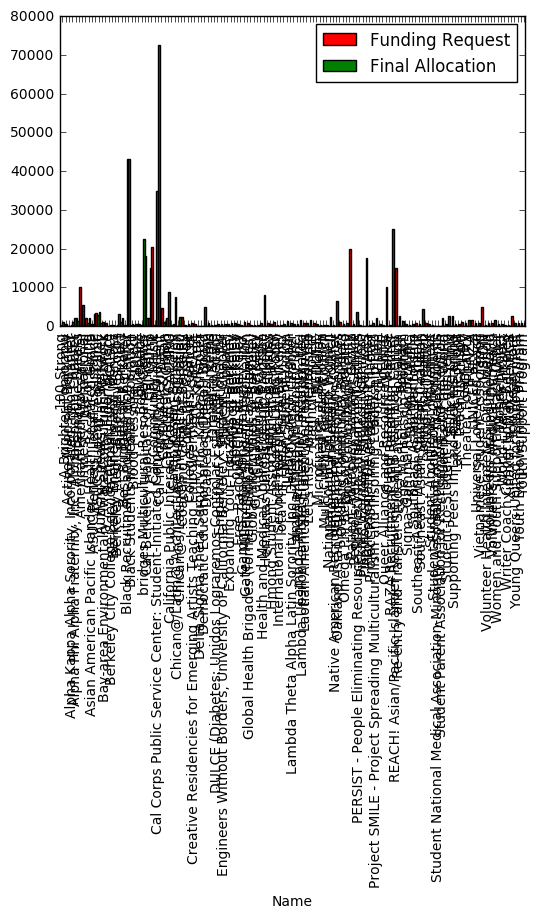

ASUC


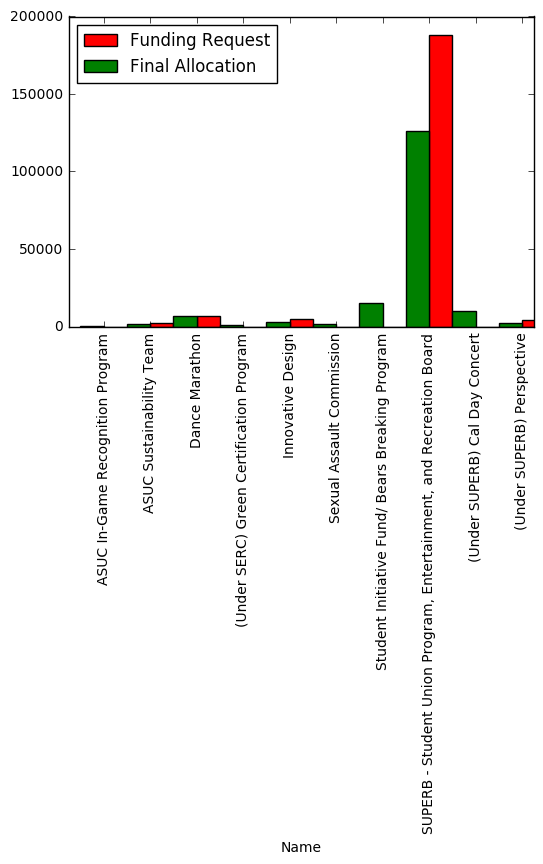

ASUC


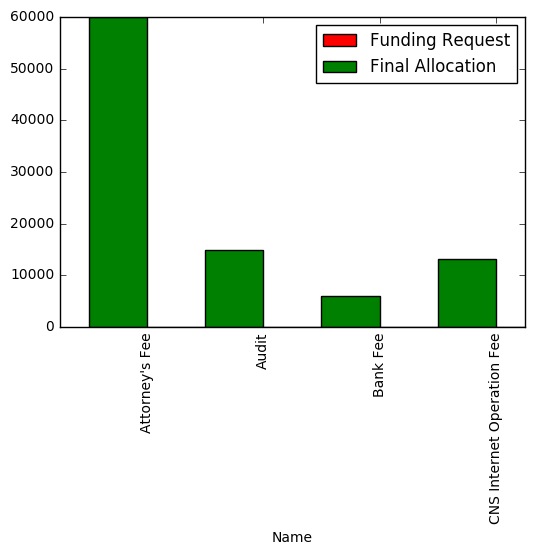

LEAD


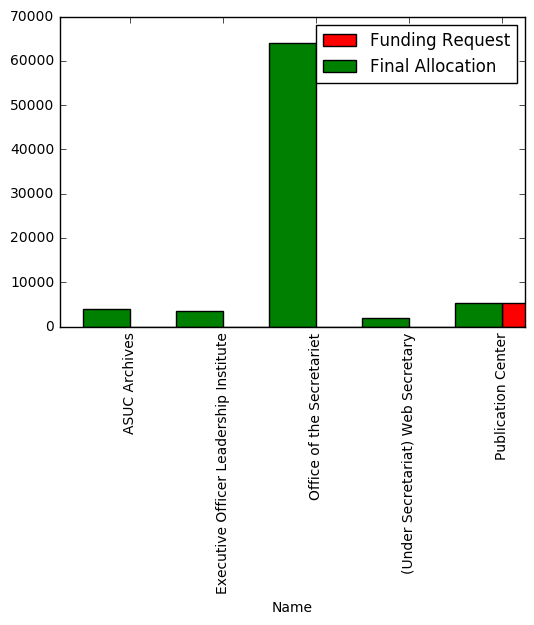

OP


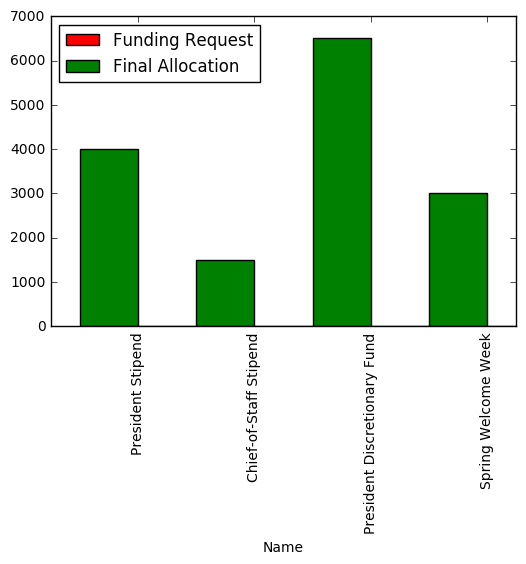

In [182]:
for i in range(len(categories)):
    print(categories[i]['Type'][1])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    categories[i].plot(kind='bar', color='red', ax=ax, position=0, x='Name',y='Funding Request')
    categories[i].plot(kind='bar', color='green', ax=ax, position=1, x='Name',y='Final Allocation')
    plt.show()

# Difference in Money Percentage Requested vs. Allocated by Organization Type

PUB


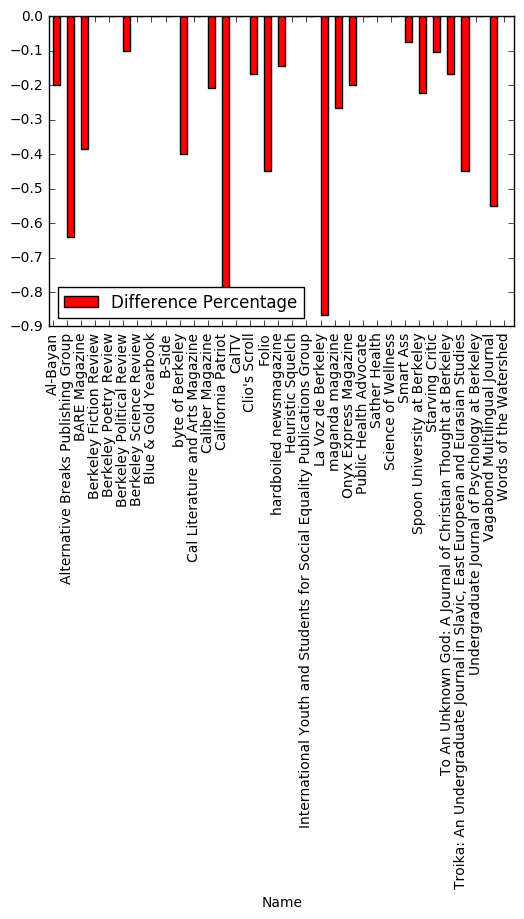

1    SAG
1    SAG
1    SAG
1    SAG
1    SAG
1    SAG
Name: Type, dtype: object


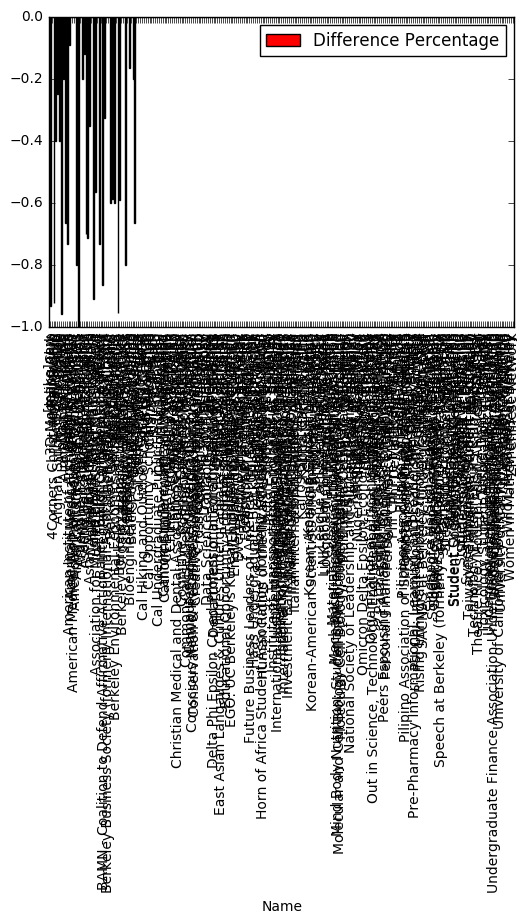

1    SISG
1    SISG
1    SISG
1    SISG
Name: Type, dtype: object


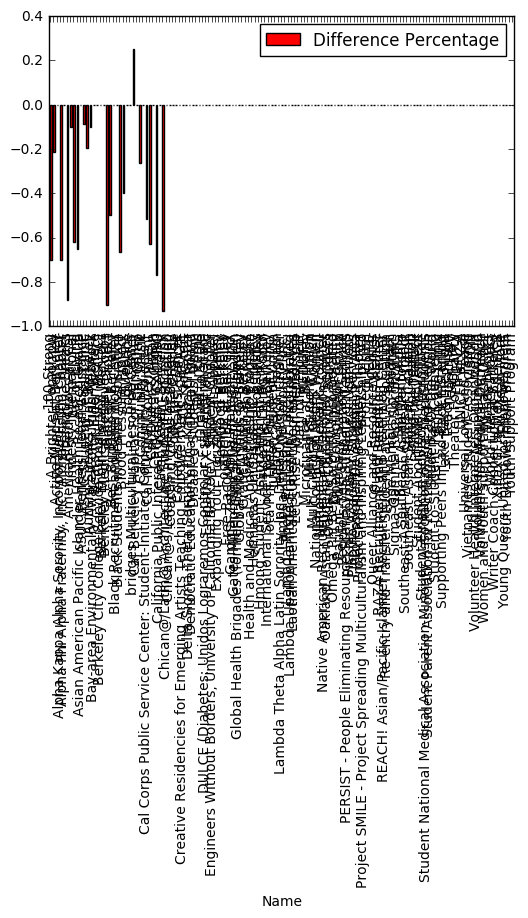

ASUC


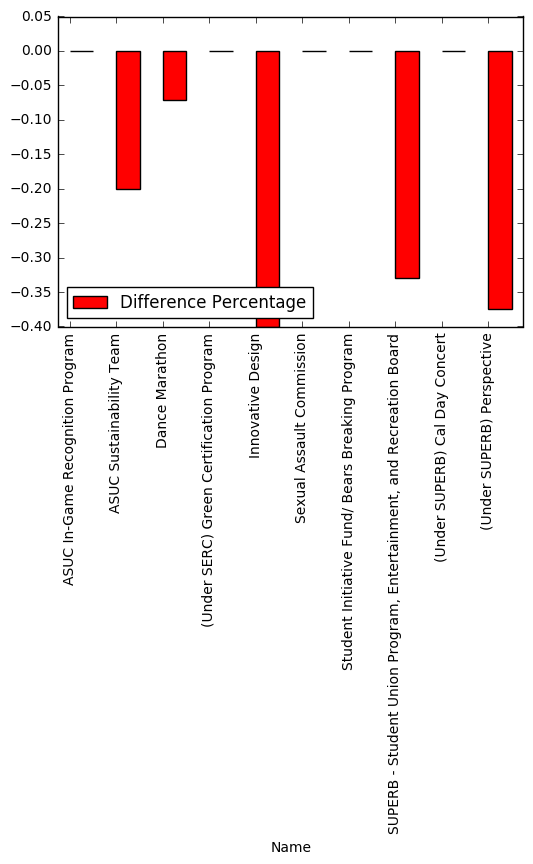

ASUC


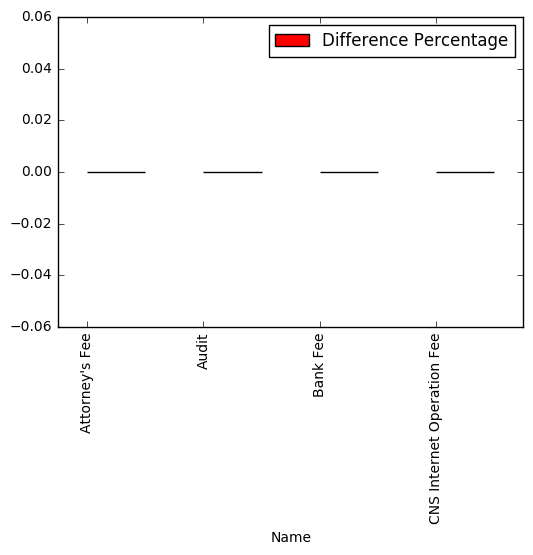

LEAD


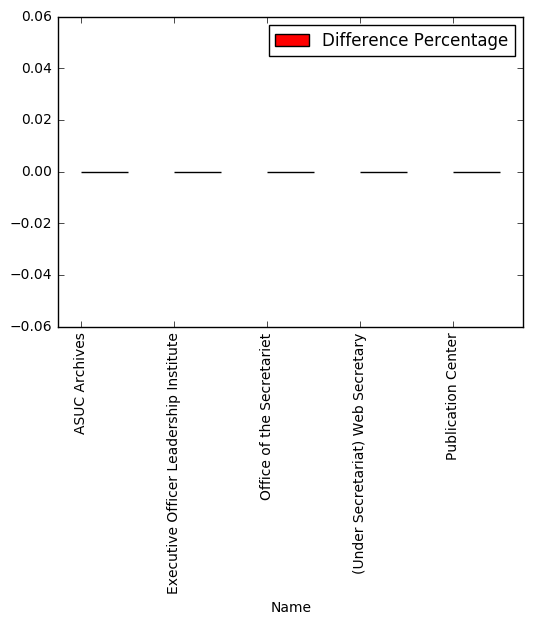

OP


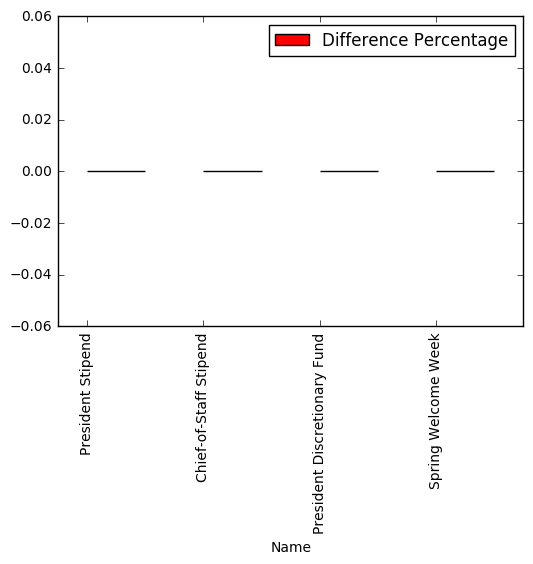

In [183]:
for i in range(len(categories)):
    print(categories[i]['Type'][1])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    categories[i].plot(kind='bar', color='red', ax=ax, position=0, x='Name',y='Difference Percentage')
    plt.show()

# Top 10 Differences in Money Requested vs. Allocated by Organization Type

PUB


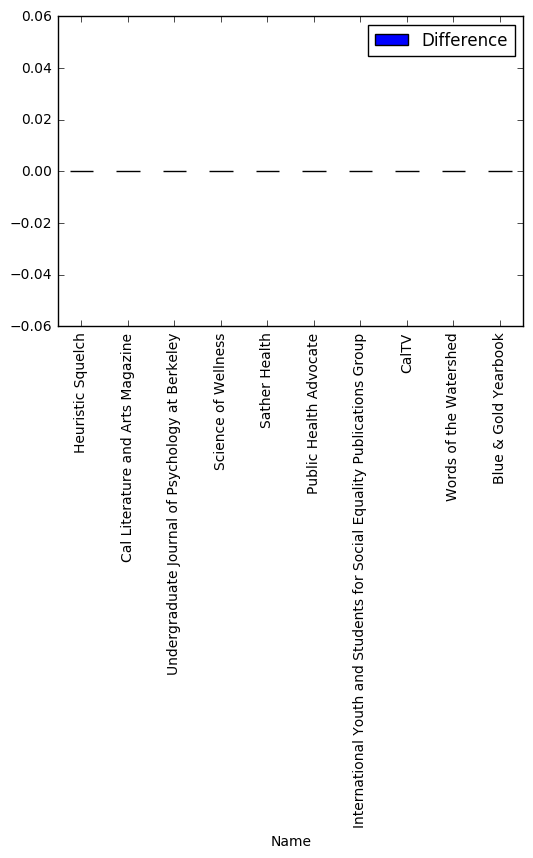

1    SAG
1    SAG
1    SAG
1    SAG
1    SAG
1    SAG
Name: Type, dtype: object


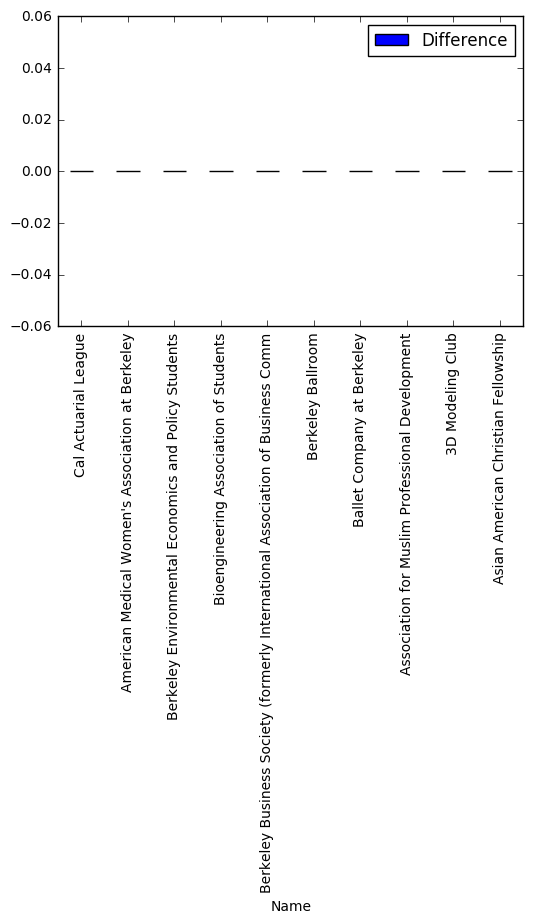

1    SISG
1    SISG
1    SISG
1    SISG
Name: Type, dtype: object


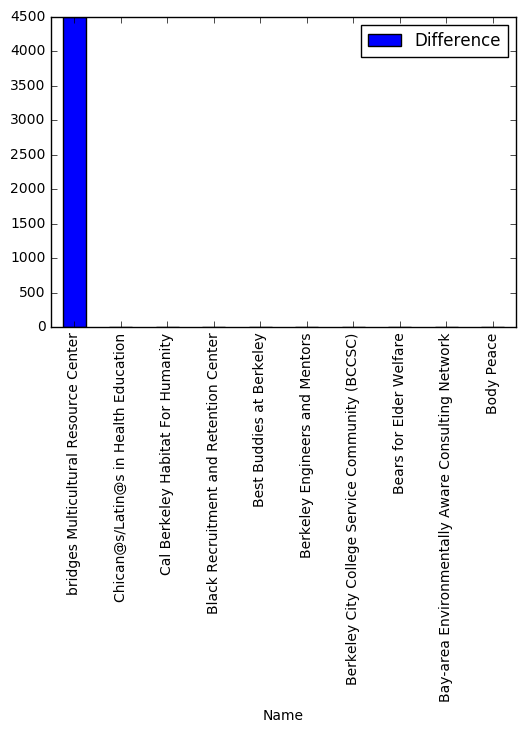

ASUC


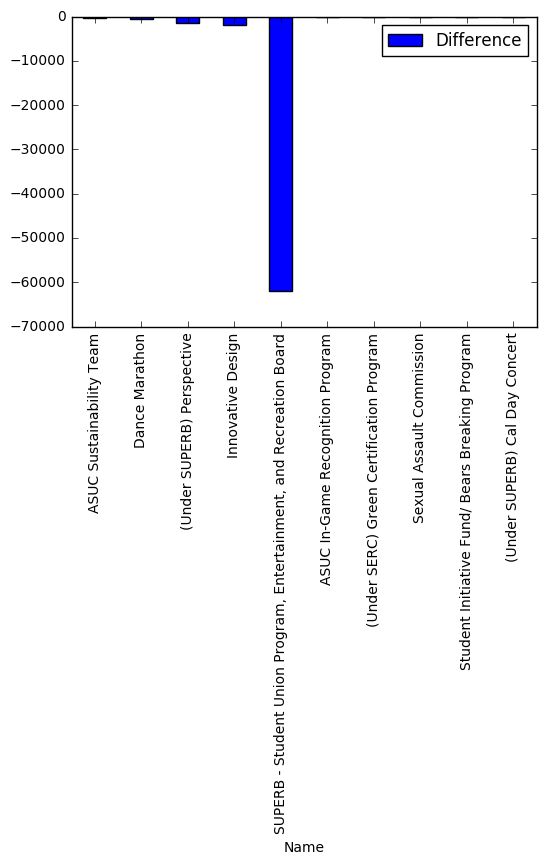

ASUC


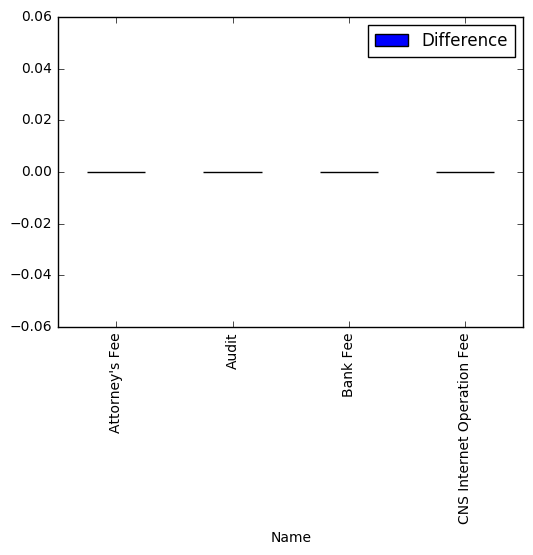

LEAD


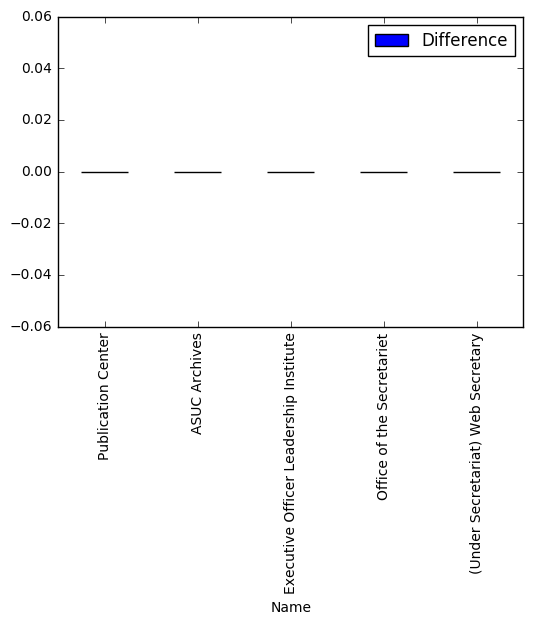

OP


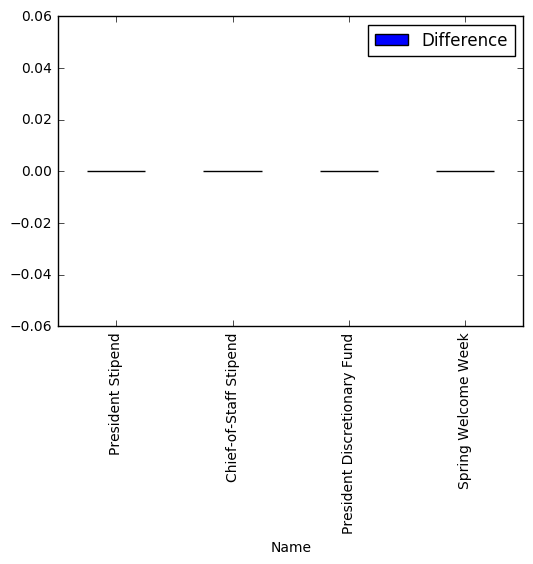

In [184]:
for i in range(len(categories)):
    print(categories[i]['Type'][1])
    
    plt.figure()
    categories[i].sort_values(['Difference'], ascending=False, inplace=False)[0:10].plot(kind='bar', x='Name',y='Difference')
    plt.show()

# Top 10 Difference Percentages in Money Requested vs. Allocated by Organization Type

PUB


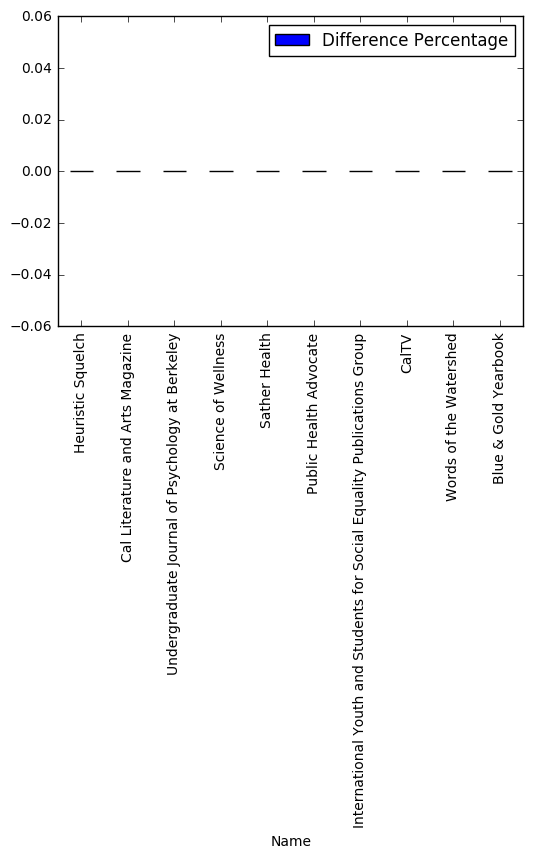

1    SAG
1    SAG
1    SAG
1    SAG
1    SAG
1    SAG
Name: Type, dtype: object


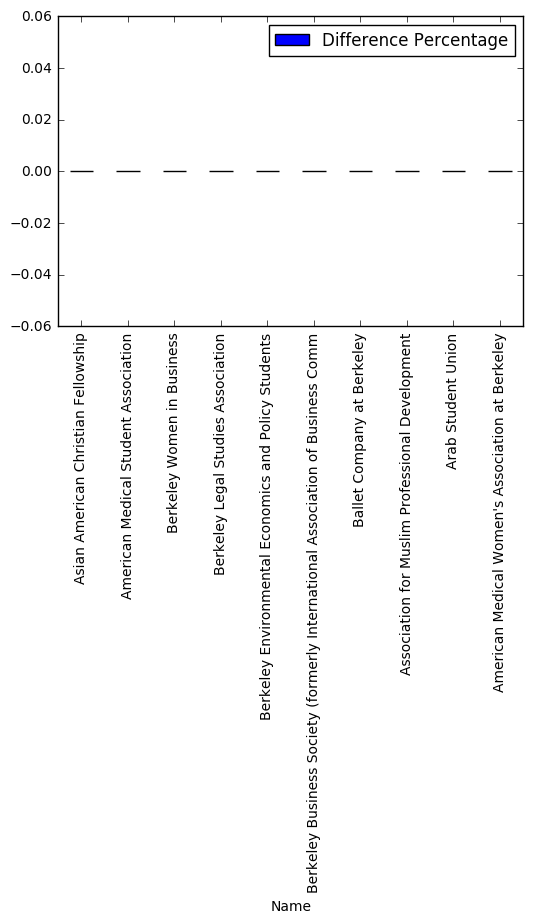

1    SISG
1    SISG
1    SISG
1    SISG
Name: Type, dtype: object


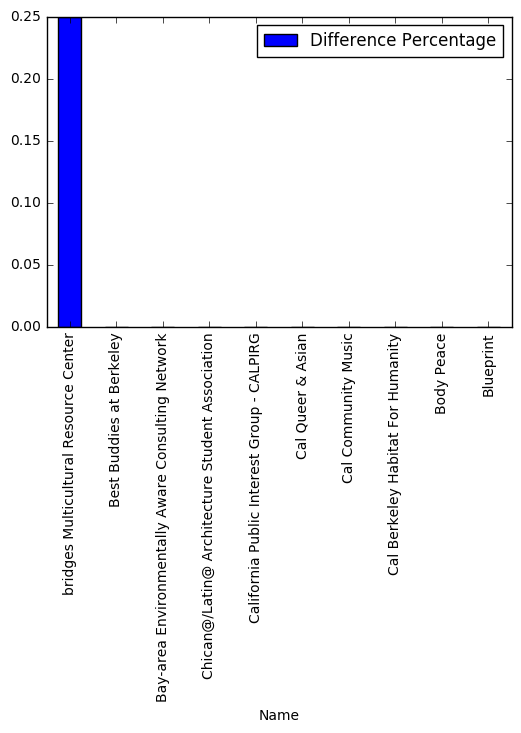

ASUC


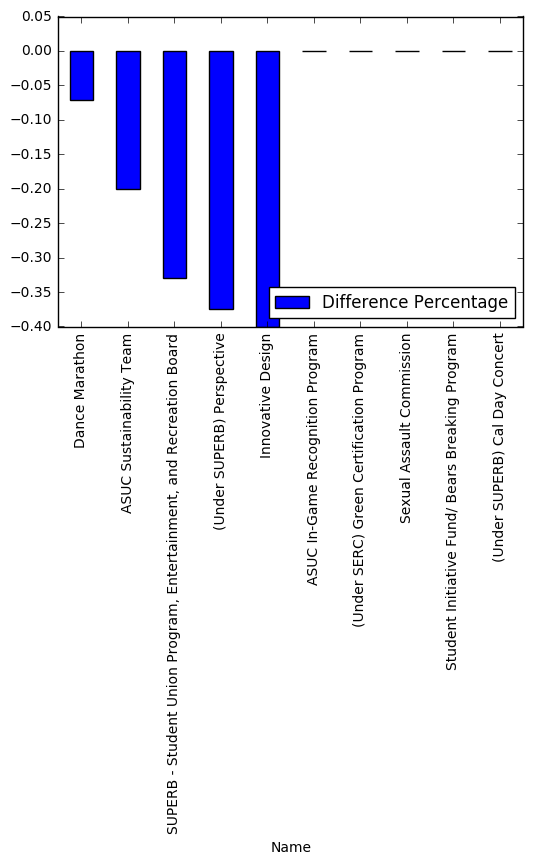

ASUC


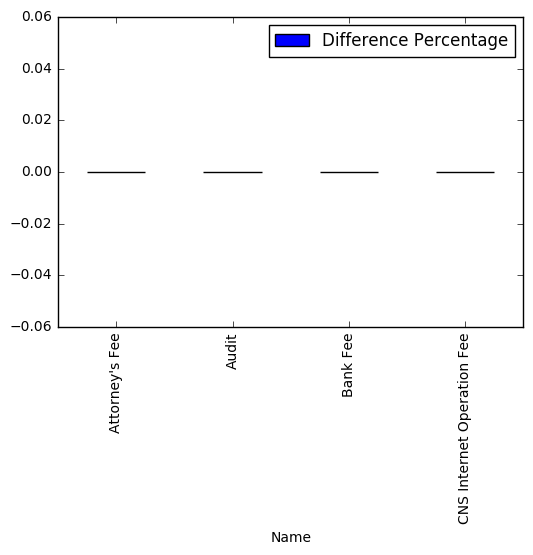

LEAD


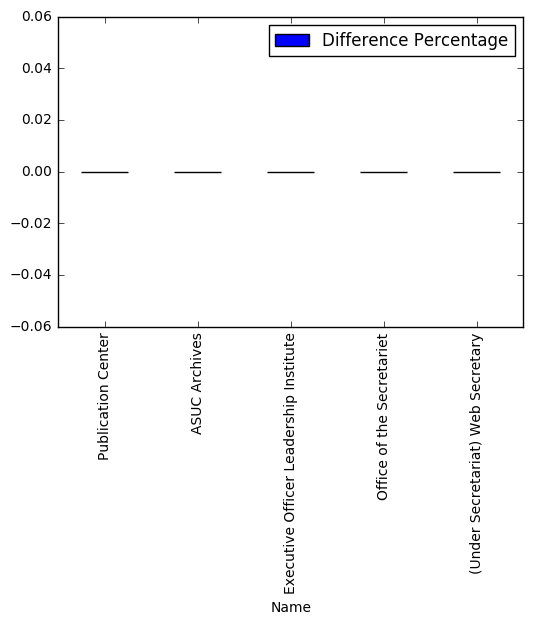

OP


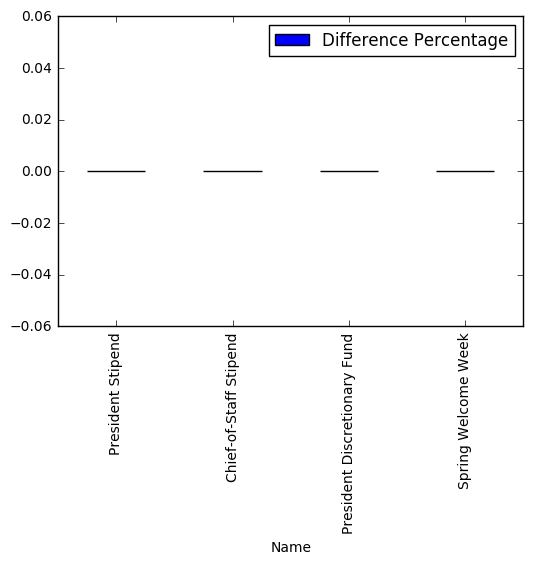

In [185]:
for i in range(len(categories)):
    print(categories[i]['Type'][1])
    
    plt.figure()
    categories[i].sort_values(['Difference Percentage'], ascending=False, inplace=False)[0:10].plot(kind='bar', x='Name',y='Difference Percentage')
    plt.show()

# Overall Top 10 Differences in Money Requested vs. Allocated

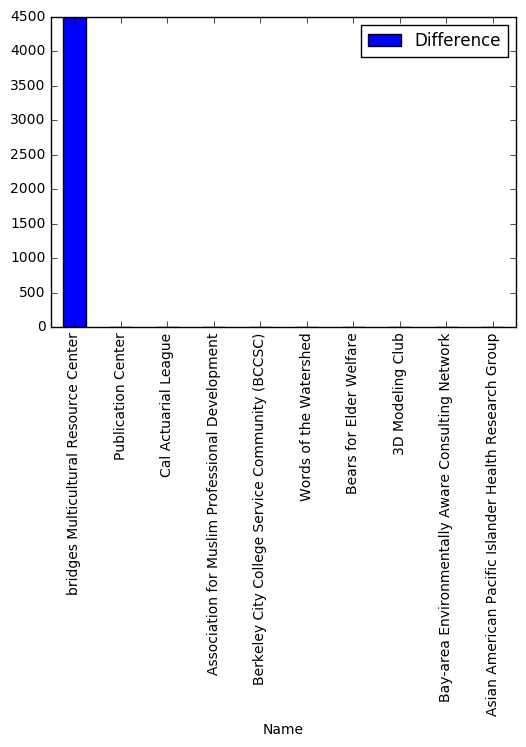

In [186]:
all_combined = pd.concat(categories)

plt.figure()
all_combined.sort_values(['Difference'], ascending=False, inplace=False)[0:10].plot(kind='bar', x='Name',y='Difference')
plt.show()

# Overall Top 10 Difference Percentages in Money Requested vs. Allocated

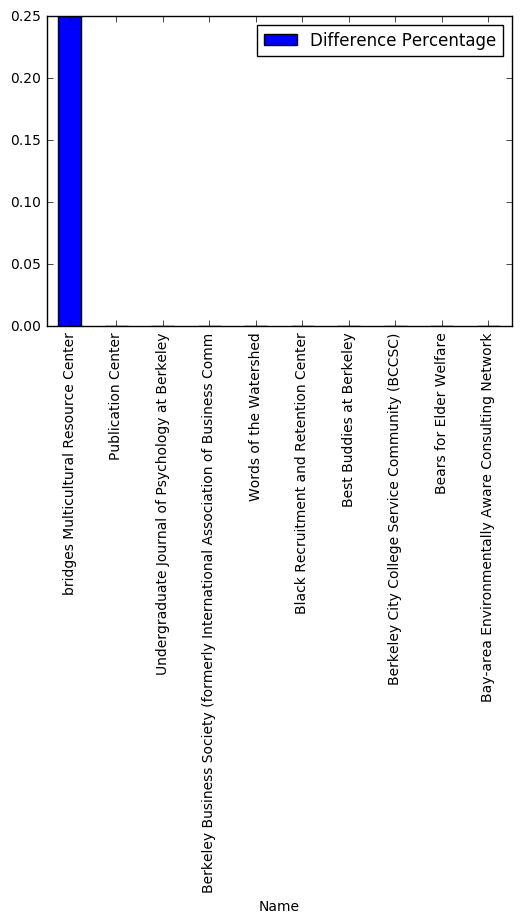

In [187]:
all_combined = pd.concat(categories)

plt.figure()
all_combined.sort_values(['Difference Percentage'], ascending=False, inplace=False)[0:10].plot(kind='bar', x='Name',y='Difference Percentage')
plt.show()

# Overall Bottom 10 Differences in Money Requested vs. Allocated

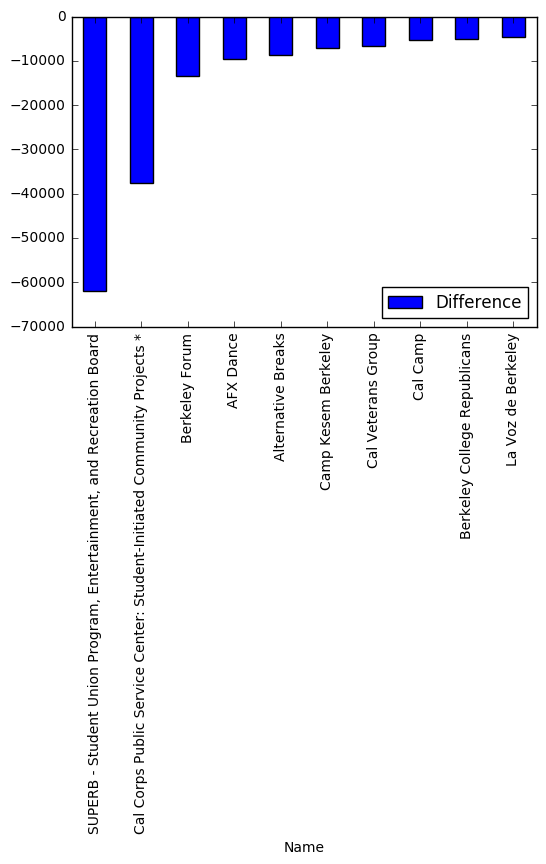

In [188]:
all_combined = pd.concat(categories)

plt.figure()
all_combined.sort_values(['Difference'], ascending=True, inplace=False)[0:10].plot(kind='bar', x='Name',y='Difference')
plt.show()

# Overall Bottom 10 Difference Percentages in Money Requested vs. Allocated

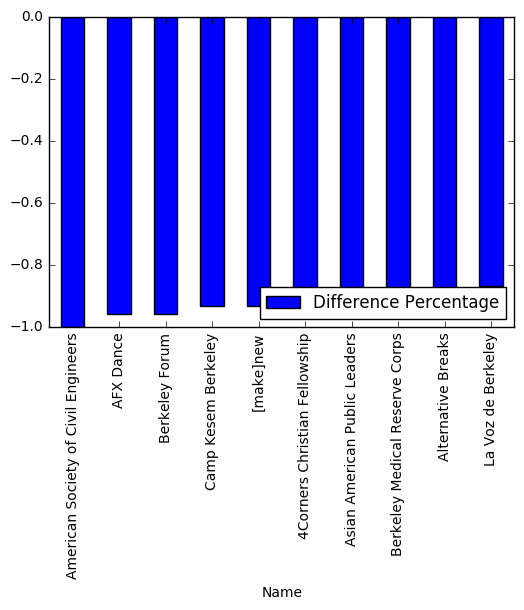

In [189]:
all_combined = pd.concat(categories)

plt.figure()
all_combined.sort_values(['Difference Percentage'], ascending=True, inplace=False)[0:10].plot(kind='bar', x='Name',y='Difference Percentage')
plt.show()

# Clubs to Look At

bridges Multicultural Resource Center,
AFX Dance,
SUPERB,
Innovative Design,
La Voz de Berkeley